# [Máquinas de soporte vectorial (SVM)](https://scikit-learn.org/stable/modules/svm.html#svm-classification)

## Paquetes numpy y pandas

In [1]:
import numpy as np
import pandas as pd

### Para fines de estética en la salida, se desactivan las advertencias que pueda informar el intérprete Python

In [2]:
import warnings 
warnings.filterwarnings("ignore")

## Paquetes para la construcción del gráfico

In [3]:
# Paquetes para los gráficos
import matplotlib.pyplot as plt
import graphviz 

## Importación método para creación del conjunto de entrenamiento desde paquete *sklearn*

In [4]:
from sklearn.model_selection import train_test_split

## Paquete sklearn que contiene los métodos para árboles de decisión 

In [5]:
# Métodos para árboles de decisión desde sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm, datasets

## Lectura de los datos desde el archivo *datosAB.txt*

In [6]:
# Esta es la opción para Jupyter Lab/Notebook
datos = pd.read_table("datosAB.txt", sep='\t')

## Creación de conjunto de datos 

In [51]:
# Conjunto de datos
X = datos.iloc[:,:-1]
y = datos.iloc[:,2]

## Creación de subconjutos CP y CE

In [52]:
# Se elige una semilla para la selección pseudo-aleatoria
semilla = 123456

In [53]:
X_ce, X_cp, y_ce, y_cp = train_test_split(X, y, test_size=0.3, random_state=semilla)

## Creación y ajuste del clasificador SVM

In [54]:
# Entrenamiento y ajuste
clasificador = svm.SVC(kernel="poly", degree=3, gamma="auto", C=1.0)
clasificador = clasificador.fit(X_ce, y_ce)

## Predicción

In [55]:
y_pred = clasificador.predict(X_cp)

In [56]:
print(y_cp)

16       rojo
30    naranja
0        rojo
22    naranja
35    naranja
24    naranja
3        rojo
5        rojo
9        rojo
17       rojo
34    naranja
Name: clase, dtype: object


In [57]:
print(y_pred)

['rojo' 'naranja' 'rojo' 'naranja' 'rojo' 'naranja' 'rojo' 'rojo'
 'naranja' 'naranja' 'naranja']


## Creación de los resultados estadísticos de la clasificación

### Importación de método para la matriz de confusión desde paquete *sklearn*

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Cálculo de la matriz de confusión

In [59]:
mconf = confusion_matrix(y_cp, y_pred)

### Impresión de la matriz de confusión

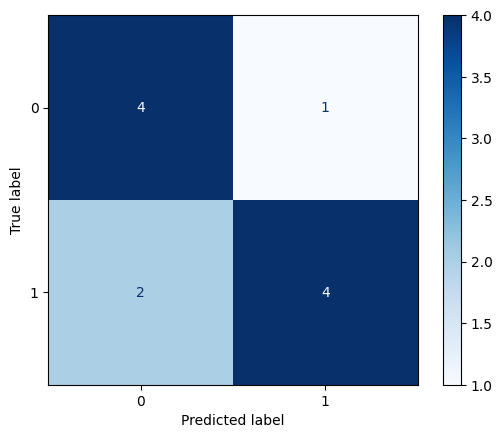

In [60]:
mconfg = ConfusionMatrixDisplay(mconf).plot(cmap='Blues') 

### Importación de método para la puntuación de precisión desde paquete *sklearn*

In [61]:
from sklearn.metrics import accuracy_score

### Cálculo de la puntuación de precisión

In [62]:
cc = accuracy_score(y_cp, y_pred)

### Impresión de la puntuación

In [63]:
print(f'Accuracy Score = {cc}')

Accuracy Score = 0.7272727272727273


## Importación de métodos para el gráfico 

In [64]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Ajuste del etiquetado de la variable y

In [65]:
y_ce

7        rojo
19    naranja
13       rojo
31    naranja
33    naranja
25    naranja
28    naranja
21    naranja
14       rojo
2        rojo
6        rojo
18    naranja
15       rojo
26    naranja
20    naranja
11       rojo
12       rojo
29    naranja
10       rojo
8        rojo
4        rojo
23    naranja
32    naranja
27    naranja
1        rojo
Name: clase, dtype: object

In [66]:
y_cp

16       rojo
30    naranja
0        rojo
22    naranja
35    naranja
24    naranja
3        rojo
5        rojo
9        rojo
17       rojo
34    naranja
Name: clase, dtype: object

In [67]:
# Importación del etiquetador
from sklearn.preprocessing import LabelEncoder
# Creación del etiquetador
labelencoder_y = LabelEncoder()
# Etiquetado y ajuste
y_ce = labelencoder_y.fit_transform(y_ce)

In [68]:
y_ce

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1])

### **Nota:** Es necesario realizar el ajuste de nuevo dado que cambió la variable y debido al proceso de etiquetado

In [69]:
clasificador.fit(X_ce, y_ce)

SVC(gamma='auto', kernel='poly')

# Se grafica todo el conjunto de datos empleando el clasificador DT para cada dato

In [70]:
# Etiquetado y ajuste del conjunto de datos original
X_set, y_set = X, labelencoder_y.fit_transform(y)

## Creación de la malla (plano cartesiano)

In [71]:
X1, X2 = np.meshgrid(
    np.arange(start = X_set.iloc[:,0].min()-1, stop = X_set.iloc[:,0].max()+1, step=0.1),
    np.arange(start = X_set.iloc[:,1].min()-1, stop = X_set.iloc[:,1].max()+1, step=0.1)
)

## Creación del gráfico

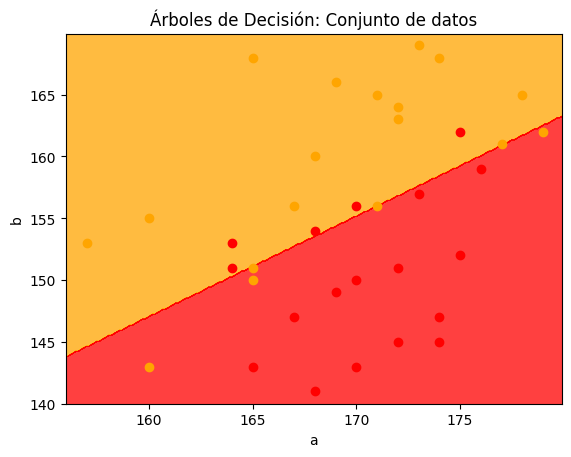

In [72]:
# Al construir la malla, se colorea la región de naranja o rojo 
# de acuerdo al clasificador DT obtenido
plt.contourf(X1, X2, 
    clasificador.predict(
        np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha = 0.75, cmap = ListedColormap(('orange', 'red'))                
)

# Se establecen los límites de los ejes x,y en el gráfico
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Se grafica cada dato en el plano cartesiano, la clase de cada dato determina el color. 
# Debido al proceso de etiquetado, 'n' fue sustituido por 0 y 'r' sustituido por 1
# 0 -> Naranja
# 1 -> Rojo
j=0
for i in y_set:
    if i==0:
        color = "orange"
    else:
        color = "red"
    plt.scatter(
        X_set.iloc[j,0], # a
        X_set.iloc[j,1], # b
        c = color,
        label = i
    )
    j=j+1

# Etiqueta del gráfico y sus ejes
plt.title('Árboles de Decisión: Conjunto de datos')
plt.xlabel('a')
plt.ylabel('b')

# Creación del gráfico
plt.show()

# Clasificar nuevos datos con DT

## Se clasifica un dato con el clasificador construido con DT

dato = (160, 145)

In [73]:
# Predicción del dato = (160, 145)
x = clasificador.predict([[160, 145]])
if x==0:
    print('naranja')
else:
    print('rojo')

rojo


## Se clasifica otro dato con el clasificador construido con DT

dato = (160, 165)

In [74]:
# Predicción del dato = (160, 165)
x = clasificador.predict([[160, 165]])
if x==0:
    print('naranja')
else:
    print('rojo')

naranja


## Ahora, a manera de prueba, se clasifica el promedio de los datos

In [75]:
# X_set es un DataFrame de pandas
X_set.mean(0)

a    169.694444
b    155.000000
dtype: float64

In [76]:
# Predicción del dato promedio = (169.6944, 155)
x = clasificador.predict([[169.6944, 155]])
if x==0:
    print('naranja')
else:
    print('rojo')

naranja


# Clasificación multiclase

Se utiliza el conjuto de datos iris para la clasificación mediante SVC

In [77]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

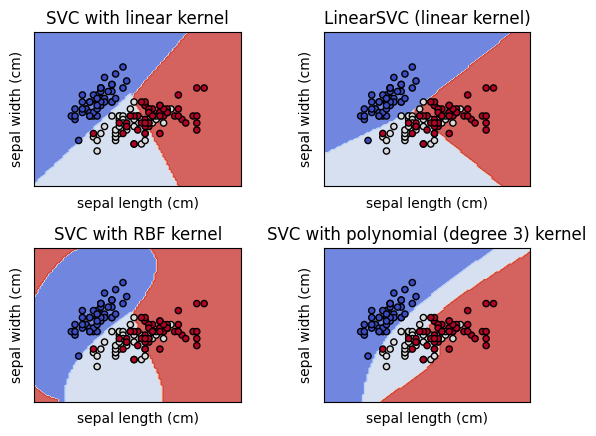

In [79]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=5, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Clasificación desbalanceada
Muestras con peso

## Ejemplo 1

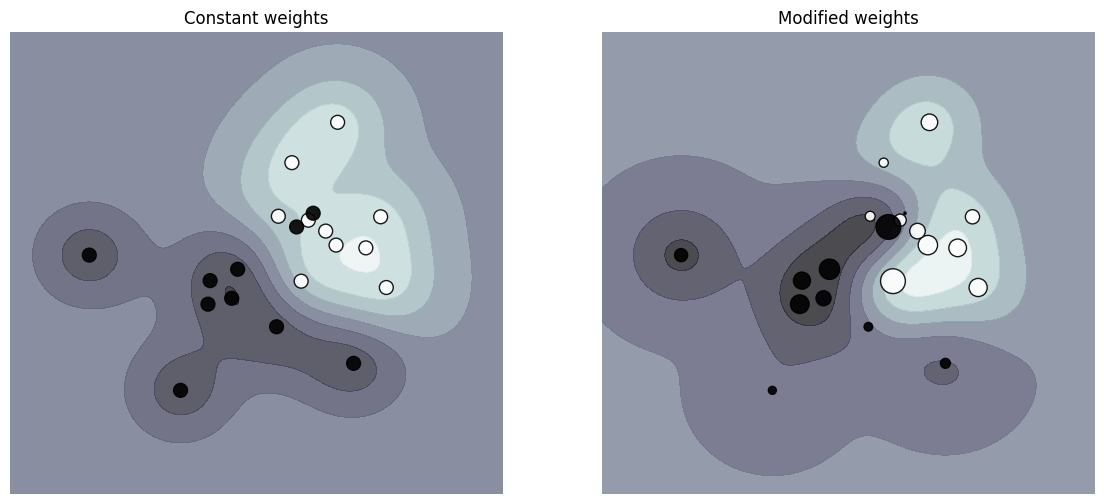

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)


# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# Fit the models.

# This model does not take into account sample weights.
clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

# This other model takes into account some dedicated sample weights.
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

fig, axes = plt.subplots(1, 2,  figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()

## Ejemplo 2

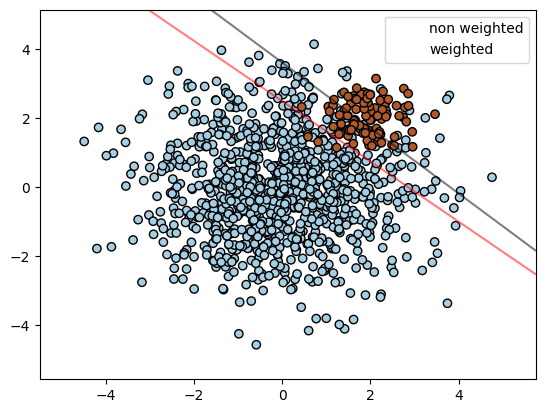

In [88]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# plot decision boundary and margins for weighted classes
wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors="r",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend(
    [disp.surface_.collections[0], wdisp.surface_.collections[0]],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()